In [ ]:
#SVM - SUPPORT VECTOR MACHINE(SIMLAR TO LOGISTIC REGRESSION)

In [ ]:
s = ['Congrats ,You have won lottery and if you want lottery money,call the lottery number and get your money',
     'Give your bank details for lottery money',
     'lottery for sure if bank details are verified']

In [ ]:
type(s)

list

In [ ]:
s[1].split()
#tokenization - (creating of tokens )

['Give', 'your', 'bank', 'details', 'for', 'lottery', 'money']

In [ ]:
#1.CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
op = vect.fit_transform(s).toarray()#we are converting our sentence into numbers,so that sklearn understands it
#stopwords are english words ,which do not add much meaning to the sentence.

In [ ]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
op

array([[0, 1, 0, 3, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(op,columns = vect.get_feature_names())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0,1,0,3,2,1,0,0,1,1
1,1,0,1,1,1,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0


In [ ]:
#TFIDF - TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')
op = vect.fit_transform(s).toarray()
df = pd.DataFrame(op,columns = vect.get_feature_names())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0.000000,0.325248,0.000000,0.576289,0.494718,0.325248,0.000000,0.000000,0.325248,0.325248
1,0.526820,0.000000,0.526820,0.409123,0.526820,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.406192,0.000000,0.406192,0.315444,0.000000,0.000000,0.534093,0.534093,0.000000,0.000000


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep ='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [3]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

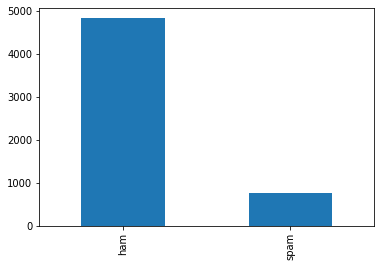

In [5]:
df['label'].value_counts().plot(kind= 'bar')

In [10]:
#divide into i/p and o/p
x = df['message'].values   # INPUT
y = df.iloc[:,0].values # iloc[rows,columns] # OUTPUT

In [15]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0)

In [16]:
x_train.shape

(4179,)

In [17]:
x_test.shape

(1393,)

In [18]:
y_train.shape

(4179,)

In [19]:
y_test.shape

(1393,)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [22]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [23]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [24]:
text = df['message'][100]
text

"Please don't text me anymore. I have nothing else to say."

In [25]:
text =vect.transform([text])
model.predict(text)

array(['ham'], dtype=object)